<a href="https://colab.research.google.com/github/abdullah345/Cancer-detection/blob/master/cats_and_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cats And Dogs Classifier 
In this notebook i have worked up on Cats and Dogs Breeds Classification Oxford Dataset present on kaggle








In [6]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [10]:
import kaggle

In [0]:
!pip install -q kaggle

In [12]:
!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

 99% 769M/774M [00:19<00:00, 37.5MB/s]
100% 774M/774M [00:19<00:00, 41.7MB/s]


In [13]:
from google.colab import files
files.upload()

{}

In [14]:
!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset -p /content/gdrive/My\ Drive/kaggle/CatsAndDogs


100% 774M/774M [00:22<00:00, 32.3MB/s]



In [0]:

#os.chdir('gdrive/My Drive/kaggle/CatsAndDogs')
!unzip -q cats-and-dogs-breeds-classification-oxford-dataset.zip -d data

In [0]:
import tarfile
if ('/content/data/images.tar.gz'.endswith("tar.gz")):
    tar = tarfile.open('/content/data/images.tar.gz', "r:gz")
    tar.extractall()
    tar.close()
elif ('/content/gdrive/My Drive/kaggle/CatsAndDogs/images.tar.gz'.endswith("tar")):
    tar = tarfile.open('/content/gdrive/My Drive/kaggle/CatsAndDogs/images.tar.gz', "r:")
    tar.extractall()
    tar.close()

In [0]:
import re

### run this for both cats and dogs (2 times)

In [0]:
cats={'Sphynx'}
#dogs={'americanbulldog'}
Animals={'Abyssinian'}
f = open("/content/list2.txt", "r")
for x in f:
  if x[0].isupper():
    cats.add(''.join(a for a in x if a.isalpha()) )
    
    #print(x.split('_')[0])
   # cats.add(re.sub("\D", "", x)
    


In [20]:
len(dogs),len(cats)

(25, 12)

In [0]:
!mkdir dataset

In [24]:
!pwd

/content


In [25]:
%cd dataset

/content/dataset


str

In [0]:
for name in dogs:
  path = Path(name)
  dest = path/name
  dest.mkdir(parents = True, exist_ok = True)

In [0]:
import shutil

shutil.rmtree('name')

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!rm -fr '/content/dataset'

In [0]:
for name in cats:
  path = Path(name)
  dest = path/name
  dest.mkdir(parents = True, exist_ok = True)

In [0]:
from shutil import copyfile

In [0]:

for file in os.listdir('/content/images'):
    filename1 = os.path.basename(file)
    filename = os.path.basename(''.join(a for a in filename1 if a.isalpha()) )
    src_dir = "/content/images/"+filename1
    dst_dir = '/content/dataset/'+filename
    shutil.move(src_dir,dst_dir.replace('jpg',''))

In [77]:
filename

'englishsetterjpg'

In [0]:
%cd staffordshire

/content/gdrive/My Drive/kaggle/CatsAndDogs/staffordshire


In [0]:
#deleting corrupted images
classes = []
path=Path('/content/dataset')
for c in dogs:
  classes.append(c)
for c in cats:
    classes.append(c)
for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

In [31]:
len(classes)

37

In [32]:
path.ls

<bound method <lambda> of PosixPath('/content/dataset')>

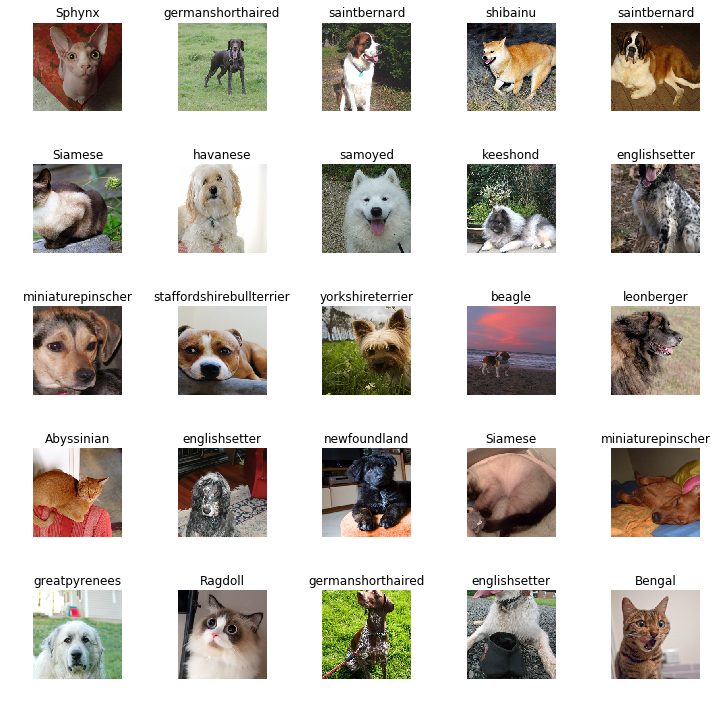

In [33]:
#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [34]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'BritishShorthair', 'EgyptianMau', 'MaineCoon', 'Persian', 'Ragdoll', 'RussianBlue', 'Siamese', 'Sphynx', 'americanbulldog', 'americanpitbullterrier', 'bassethound', 'beagle', 'boxer', 'chihuahua', 'englishcockerspaniel', 'englishsetter', 'germanshorthaired', 'greatpyrenees', 'havanese', 'japanesechin', 'keeshond', 'leonberger', 'miniaturepinscher', 'newfoundland', 'pomeranian', 'pug', 'saintbernard', 'samoyed', 'scottishterrier', 'shibainu', 'staffordshirebullterrier', 'wheatenterrier', 'yorkshireterrier']
5912
1478


#Training

In [35]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 115MB/s]


In [36]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,2.247689,0.501780,0.142084,01:38
1,0.837739,0.341528,0.104195,01:40
2,0.518187,0.282094,0.091340,01:42
3,0.401338,0.278321,0.082544,01:39
4,0.353334,0.299775,0.086604,01:39
5,0.296669,0.283885,0.078484,01:38
6,0.259291,0.282431,0.085250,01:37
7,0.228197,0.270241,0.074425,01:37
8,0.178735,0.259108,0.075778,01:38
9,0.152819,0.256088,0.075101,01:37


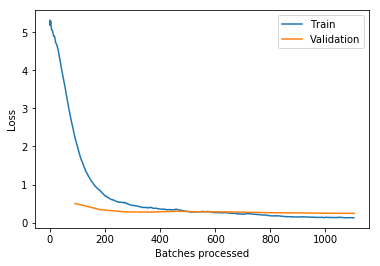

In [37]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


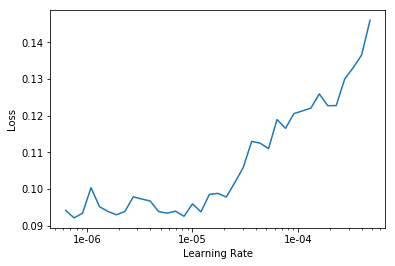

In [40]:
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.192056,0.371939,0.100812,01:41
1,0.231834,0.266724,0.072395,01:40
2,0.133187,0.234816,0.066982,01:41


This doesn't help much so we use the stage-1 training.

In [0]:
learn.save('stage-3')

#Interpretation

In [0]:
learn.load('stage-3');

In [128]:
interp = ClassificationInterpretation.from_learner(learn)

IndexError: ignored

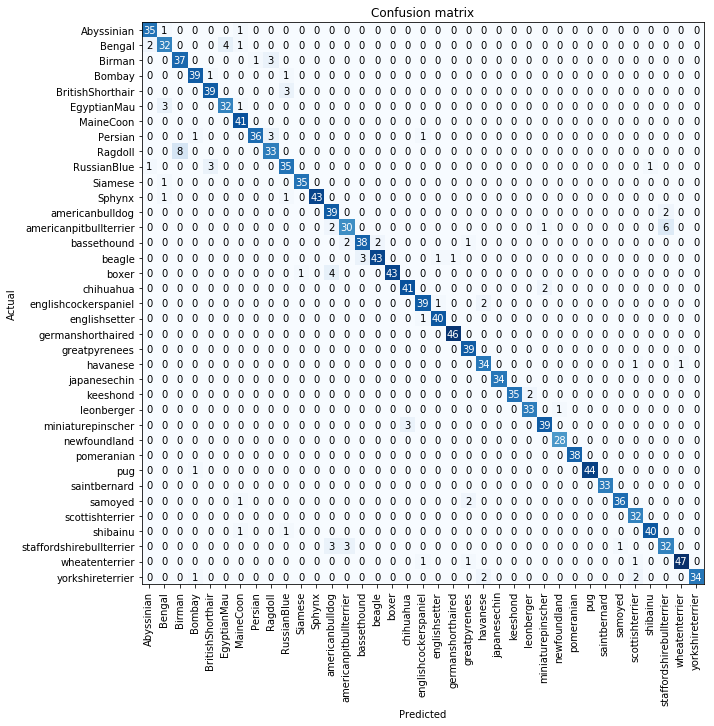

In [129]:
interp.plot_confusion_matrix(figsize=(15, 10))

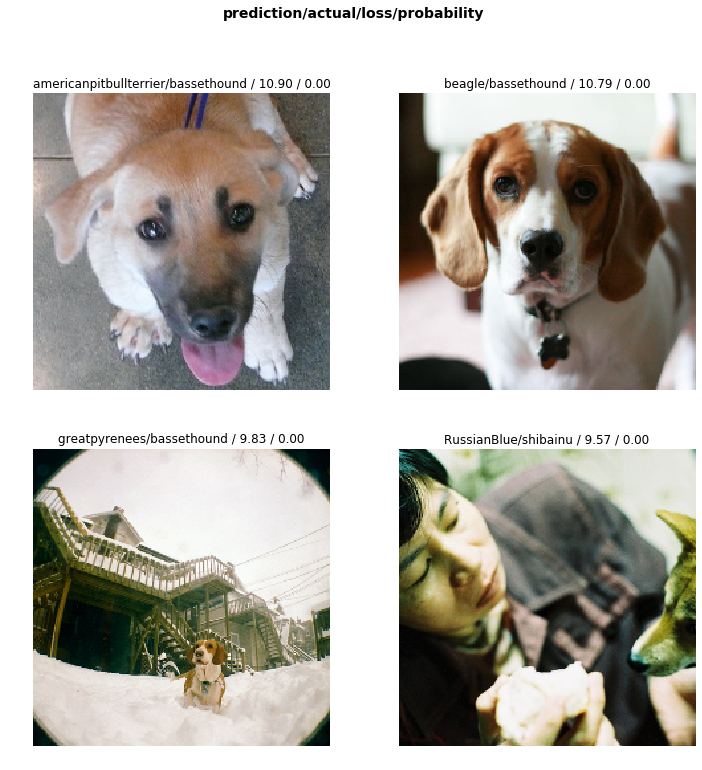

In [46]:
interp.plot_top_losses(k = 4, heatmap=False)

#Prediction

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn.export()

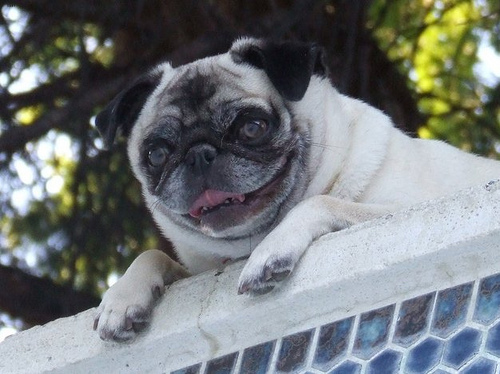

In [51]:
#example image
img = open_image(path/'pug/pug_1.jpg')
img

In [0]:
learn = load_learner(path)

In [53]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  pug


In [0]:
from io import BytesIO

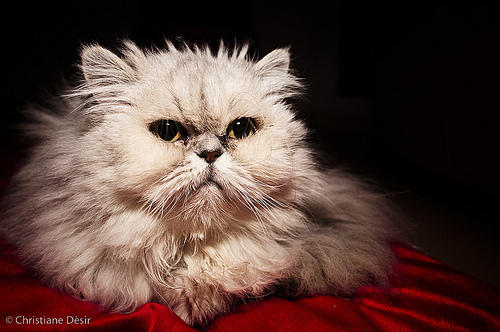

In [100]:
img = open_image(path/'Persian/Persian_104.jpg')
img

In [101]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  Persian


In [0]:
from PIL import Image

In [0]:
import asyncio

@asyncio.coroutine
async def adder(*args, delay):
    while True:
        await asyncio.sleep(delay)
        print(sum(args))

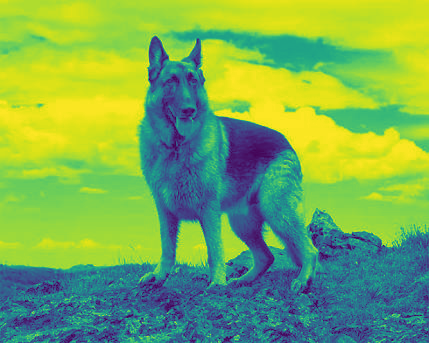

In [117]:
from fastai.vision import *
mode = '1'
#img= open_image('/content/dog.jpeg')
#img_bytes = (img.read())
img = open_image('/content/dog.jpeg', convert_mode='L')
img

In [113]:
type(img)

fastai.vision.image.Image

In [130]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  keeshond


In [120]:
np.array(outputs).max()

0.83233297

In [73]:
np.array(outputs)

array([3.307522e-10, 7.232002e-07, 1.196325e-13, 1.638132e-10, 2.213755e-11, 9.999992e-01, 1.008143e-09, 9.697125e-10,
       4.637609e-13, 4.480481e-11, 2.544377e-13, 1.258545e-08, 6.973238e-13, 1.749612e-11, 1.156733e-12, 2.175529e-12,
       5.569097e-11, 1.915465e-12, 8.264877e-13, 8.744388e-08, 9.739517e-10, 6.438271e-11, 1.075921e-11, 2.508671e-11,
       1.675660e-12, 3.594661e-13, 5.859122e-13, 6.439088e-13, 4.654180e-13, 3.047286e-11, 5.710576e-12, 4.648546e-13,
       3.280189e-12, 5.612979e-15, 3.480078e-14, 1.111652e-11, 1.539238e-10], dtype=float32)

In [64]:
print(cats,dogs)

{'Ragdoll', 'BritishShorthair', 'Persian', 'Birman', 'RussianBlue', 'MaineCoon', 'EgyptianMau', 'Bengal', 'Sphynx', 'Bombay', 'Abyssinian', 'Siamese'} {'pomeranian', 'chihuahua', 'miniaturepinscher', 'havanese', 'keeshond', 'samoyed', 'boxer', 'bassethound', 'beagle', 'americanbulldog', 'greatpyrenees', 'staffordshirebullterrier', 'saintbernard', 'wheatenterrier', 'newfoundland', 'englishsetter', 'leonberger', 'englishcockerspaniel', 'japanesechin', 'shibainu', 'germanshorthaired', 'americanpitbullterrier', 'pug', 'yorkshireterrier', 'scottishterrier'}
